<a href="https://colab.research.google.com/github/SarinaMashreghi/SpaceAppsChallenge/blob/main/DISCOVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Loading Data

In [4]:
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Nasa 2023/dsc_fc_summed_spectra_2022_v01.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [87]:
df = pd.read_csv("/content/dsc_fc_summed_spectra_2022_v01.csv")
df = pd.DataFrame(df)
df

,2022-01-01 00:00:00,-6.1717,1.12483,-4.90228,38.0314,0.231726,46.0427,44.9743,55.9143,43.7069,...,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23
0,2022-01-01 00:01:00,-6.28883,1.233130,-4.790010,38.3868,0.231726,45.525700,46.258700,55.14280,43.276800,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2022-01-01 00:02:00,-6.11811,0.871923,-5.128300,37.5636,0.231726,45.195500,46.822200,55.74840,42.789400,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2022-01-01 00:03:00,-6.28704,1.249870,-4.766400,38.1094,0.242084,46.708300,47.171300,53.53800,42.155800,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2022-01-01 00:04:00,-6.42125,1.171560,-4.532300,37.5893,0.231726,47.488800,45.323400,54.54040,44.277300,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2022-01-01 00:05:00,-5.90970,0.326091,-4.884710,39.7201,0.231726,44.015900,46.783500,56.98000,43.254800,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525594,2022-12-31 23:55:00,-1.95967,4.958450,-1.202990,44.4151,0.231726,0.231726,5.561450,16.87790,0.231726,...,363.400,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
525595,2022-12-31 23:56:00,-1.82694,4.650830,0.351759,38.3516,0.231726,0.231726,17.396800,12.84820,0.231726,...,340.761,266.921,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
525596,2022-12-31 23:57:00,-3.77304,3.876940,0.440392,20.2907,0.231726,0.246122,0.885469,9.77093,0.231726,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
525597,2022-12-31 23:58:00,-3.18466,4.436660,1.084170,54.5463,0.231726,0.678061,1.230790,26.98440,0.231726,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
cols = [f"column_{i}" for i in range(df.shape[1])]
df.columns = cols
df

,column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,...,column_44,column_45,column_46,column_47,column_48,column_49,column_50,column_51,column_52,column_53
0,2022-01-01 00:01:00,-6.28883,1.233130,-4.790010,38.3868,0.231726,45.525700,46.258700,55.14280,43.276800,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2022-01-01 00:02:00,-6.11811,0.871923,-5.128300,37.5636,0.231726,45.195500,46.822200,55.74840,42.789400,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2022-01-01 00:03:00,-6.28704,1.249870,-4.766400,38.1094,0.242084,46.708300,47.171300,53.53800,42.155800,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2022-01-01 00:04:00,-6.42125,1.171560,-4.532300,37.5893,0.231726,47.488800,45.323400,54.54040,44.277300,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2022-01-01 00:05:00,-5.90970,0.326091,-4.884710,39.7201,0.231726,44.015900,46.783500,56.98000,43.254800,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525594,2022-12-31 23:55:00,-1.95967,4.958450,-1.202990,44.4151,0.231726,0.231726,5.561450,16.87790,0.231726,...,363.400,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
525595,2022-12-31 23:56:00,-1.82694,4.650830,0.351759,38.3516,0.231726,0.231726,17.396800,12.84820,0.231726,...,340.761,266.921,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
525596,2022-12-31 23:57:00,-3.77304,3.876940,0.440392,20.2907,0.231726,0.246122,0.885469,9.77093,0.231726,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
525597,2022-12-31 23:58:00,-3.18466,4.436660,1.084170,54.5463,0.231726,0.678061,1.230790,26.98440,0.231726,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
df.dropna(subset=["column_1", "column_2", "column_3"], inplace=True)
df

,column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,...,column_44,column_45,column_46,column_47,column_48,column_49,column_50,column_51,column_52,column_53
0,2022-01-01 00:01:00,-6.28883,1.233130,-4.790010,38.3868,0.231726,45.525700,46.258700,55.14280,43.276800,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2022-01-01 00:02:00,-6.11811,0.871923,-5.128300,37.5636,0.231726,45.195500,46.822200,55.74840,42.789400,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2022-01-01 00:03:00,-6.28704,1.249870,-4.766400,38.1094,0.242084,46.708300,47.171300,53.53800,42.155800,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2022-01-01 00:04:00,-6.42125,1.171560,-4.532300,37.5893,0.231726,47.488800,45.323400,54.54040,44.277300,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2022-01-01 00:05:00,-5.90970,0.326091,-4.884710,39.7201,0.231726,44.015900,46.783500,56.98000,43.254800,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525594,2022-12-31 23:55:00,-1.95967,4.958450,-1.202990,44.4151,0.231726,0.231726,5.561450,16.87790,0.231726,...,363.400,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
525595,2022-12-31 23:56:00,-1.82694,4.650830,0.351759,38.3516,0.231726,0.231726,17.396800,12.84820,0.231726,...,340.761,266.921,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
525596,2022-12-31 23:57:00,-3.77304,3.876940,0.440392,20.2907,0.231726,0.246122,0.885469,9.77093,0.231726,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
525597,2022-12-31 23:58:00,-3.18466,4.436660,1.084170,54.5463,0.231726,0.678061,1.230790,26.98440,0.231726,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
X = df.drop(["column_1", "column_2", "column_3", "column_0"], axis=1)
y = df[["column_1", "column_2", "column_3"]]
X

,column_4,column_5,column_6,column_7,column_8,column_9,column_10,column_11,column_12,column_13,...,column_44,column_45,column_46,column_47,column_48,column_49,column_50,column_51,column_52,column_53
0,38.3868,0.231726,45.525700,46.258700,55.14280,43.276800,65.272000,67.766500,156.8700,113.976000,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,37.5636,0.231726,45.195500,46.822200,55.74840,42.789400,61.460100,64.575000,157.1830,112.772000,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,38.1094,0.242084,46.708300,47.171300,53.53800,42.155800,63.757300,66.913900,159.1120,114.023000,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,37.5893,0.231726,47.488800,45.323400,54.54040,44.277300,69.990800,67.977200,156.2540,117.930000,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,39.7201,0.231726,44.015900,46.783500,56.98000,43.254800,59.960900,66.796100,160.1090,114.405000,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525594,44.4151,0.231726,0.231726,5.561450,16.87790,0.231726,0.231726,5.842020,45.9274,0.231726,...,363.400,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
525595,38.3516,0.231726,0.231726,17.396800,12.84820,0.231726,0.428618,11.170000,21.4848,0.231726,...,340.761,266.921,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
525596,20.2907,0.231726,0.246122,0.885469,9.77093,0.231726,0.285326,0.471761,37.0559,0.231726,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
525597,54.5463,0.231726,0.678061,1.230790,26.98440,0.231726,3.211080,5.997920,44.9920,0.231726,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((419559, 50), (419559, 3), (104890, 50), (104890, 3))

##PCA

In [99]:
from sklearn.decomposition import PCA

pca = PCA(n_components=x_train.shape[1], random_state=42)
pca.fit(x_train)
x_train_pca = pca.transform(x_train)

In [100]:
pca.explained_variance_ratio_ * 100

array([5.15479496e+01, 1.73841496e+01, 8.90569075e+00, 3.95551596e+00,
       3.02645604e+00, 2.65652618e+00, 1.69524083e+00, 1.29590507e+00,
       1.16724953e+00, 1.06354595e+00, 9.13157627e-01, 8.51887797e-01,
       6.04085967e-01, 5.11389754e-01, 4.57913097e-01, 3.96540265e-01,
       3.67109328e-01, 3.23064744e-01, 2.95807235e-01, 2.76078844e-01,
       2.27868321e-01, 2.15414704e-01, 2.11437249e-01, 1.97020902e-01,
       1.67873806e-01, 1.47086129e-01, 1.37985851e-01, 1.15819125e-01,
       1.13986665e-01, 1.08593510e-01, 9.14990219e-02, 8.49673559e-02,
       7.44888426e-02, 7.24874975e-02, 6.95894871e-02, 5.80240616e-02,
       5.49207329e-02, 4.22789297e-02, 3.00685657e-02, 2.44905068e-02,
       1.70640661e-02, 1.07301860e-02, 1.05860717e-02, 7.56034466e-03,
       6.42711349e-03, 2.73035573e-03, 2.43595308e-03, 1.05238280e-03,
       1.97378647e-04, 5.07219317e-05])

In [23]:
sum(pca.explained_variance_ratio_ * 100)

100.00000000000004

In [101]:
np.cumsum(pca.explained_variance_ratio_ * 100)

array([ 51.54794956,  68.93209919,  77.83778994,  81.7933059 ,
        84.81976194,  87.47628812,  89.17152895,  90.46743402,
        91.63468355,  92.6982295 ,  93.61138713,  94.46327493,
        95.0673609 ,  95.57875065,  96.03666375,  96.43320401,
        96.80031334,  97.12337808,  97.41918532,  97.69526416,
        97.92313248,  98.13854719,  98.34998444,  98.54700534,
        98.71487914,  98.86196527,  98.99995112,  99.11577025,
        99.22975691,  99.33835042,  99.42984945,  99.5148168 ,
        99.58930564,  99.66179314,  99.73138263,  99.78940669,
        99.84432742,  99.88660635,  99.91667492,  99.94116543,
        99.95822949,  99.96895968,  99.97954575,  99.98710609,
        99.99353321,  99.99626356,  99.99869952,  99.9997519 ,
        99.99994928, 100.        ])

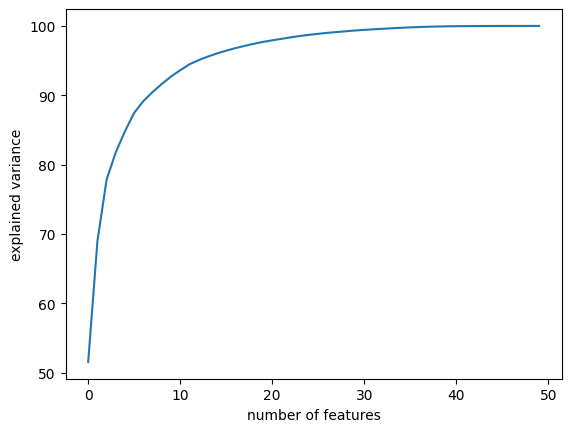

In [102]:
import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("number of features")
plt.ylabel("explained variance")
plt.show()

In [103]:
# selectin 15 features
pca_15 = PCA(n_components=15, random_state=42)
pca_15.fit(x_train)
x_train_pca = pca_15.transform(x_train)
x_test_pca = pca_15.transform(x_test)
x_test_pca.shape, sum(pca_15.explained_variance_ratio_ * 100)

((104890, 15), 96.03662119130881)

##Normalization

In [104]:
scaler = MinMaxScaler()
scaler.fit(x_train_pca)

x_train_pca_scaled = pd.DataFrame(scaler.transform(x_train_pca))
x_test_pca_scaled = pd.DataFrame(scaler.transform(x_test_pca))

In [105]:
x_train_pca_scaled.shape, y_train.shape

((419559, 15), (419559, 3))

##Data augmentation (if required?)

#Regression Models

In [124]:
y_test

,column_1,column_2,column_3
391366,-4.023060,3.74503,-0.044560
133648,-3.307620,-4.94065,4.040380
456432,-1.118460,-2.49209,4.952890
202334,-1.004170,3.01596,-2.527380
361983,1.131560,5.42245,-1.077050
...,...,...,...
177358,-1.043560,-1.58388,-3.313170
207494,-2.027770,-1.59945,-2.391990
428661,-0.973036,-2.99326,-0.023422
66747,1.271270,-3.66307,-2.313260


In [125]:
from tensorflow.keras.layers import *

# DNN
model_1 = tf.keras.Sequential([
    Dense(64, activation="relu", input_shape=(15,)),
    #Dense(64, activation="relu"),
    Dense(64, activation="relu"),
    Dense(3)
])

model_1.compile(loss="mse", optimizer="adam", metrics=["mse"])

In [126]:
model_1.fit(x_train_pca_scaled, y_train, epochs=10, validation_data=(x_test_pca_scaled, y_test))

Epoch 1/10
13112/13112 [==============================] - 58s 4ms/step - loss: 15.7305 - mse: 15.7305 - val_loss: 15.7002 - val_mse: 15.7002
Epoch 2/10
13112/13112 [==============================] - 56s 4ms/step - loss: 15.3998 - mse: 15.3998 - val_loss: 15.1045 - val_mse: 15.1045
Epoch 3/10
13112/13112 [==============================] - 70s 5ms/step - loss: 15.1429 - mse: 15.1429 - val_loss: 14.9222 - val_mse: 14.9222
Epoch 4/10
13112/13112 [==============================] - 70s 5ms/step - loss: 14.9174 - mse: 14.9174 - val_loss: 14.6687 - val_mse: 14.6687
Epoch 5/10
13112/13112 [==============================] - 65s 5ms/step - loss: 14.7427 - mse: 14.7427 - val_loss: 14.6368 - val_mse: 14.6368
Epoch 6/10
13112/13112 [==============================] - 63s 5ms/step - loss: 14.5724 - mse: 14.5724 - val_loss: 14.3653 - val_mse: 14.3653
Epoch 7/10
13112/13112 [==============================] - 78s 6ms/step - loss: 14.4266 - mse: 14.4266 - val_loss: 14.2950 - val_mse: 14.2950
Epoch 8/10
13

In [128]:
def show_results(y_true, y_pred):
  print(f"r2 score: {r2_score(y_true, y_pred)}")
  print(f"mae: {mean_absolute_error(y_true, y_pred)}")
  print(f"mse: {mean_squared_error(y_true, y_pred)}")

In [129]:
y_pred1 = model_1.predict(x_test_pca_scaled)

show_results(y_test, y_pred1)

3278/3278 [==============================] - 7s 2ms/step
r2 score: 0.1468287168210545
mae: 2.8802638545224197
mse: 13.915453600429792


In [130]:
from sklearn.linear_model import LinearRegression

model_2 = LinearRegression()
model_2.fit(x_train_pca_scaled, y_train)

y_pred2 = model_2.predict(x_test_pca_scaled)

show_results(y_test, y_pred2)

r2 score: 0.031762335269340136
mae: 3.112113628672987
mse: 15.879049632009922


In [131]:
# decision tree regressor
from sklearn.tree import DecisionTreeRegressor

model_3 = DecisionTreeRegressor().fit(x_train_pca_scaled, y_train)

y_pred3 = model_3.predict(x_test_pca_scaled)

show_results(y_test, y_pred3)

r2 score: 0.5430229007999112
mae: 1.4241436776359038
mse: 7.331118296610499


In [135]:
from sklearn.ensemble import GradientBoostingRegressor

model_4x = GradientBoostingRegressor(random_state=0)
model_4x.fit(x_train_pca_scaled, y_train["column_1"])
y_pred4 = model_4x.predict(x_test_pca_scaled)
show_results(y_test["column_1"], y_pred4)

r2 score: 0.16458938911946452
mae: 2.9494087293203446
mse: 12.962166023403926


In [136]:
model_4y = GradientBoostingRegressor(random_state=0)
model_4y.fit(x_train_pca_scaled, y_train["column_2"])
y_pred4y = model_4y.predict(x_test_pca_scaled)
show_results(y_test["column_2"], y_pred4y)

r2 score: 0.13728778018789056
mae: 3.2962927810269593
mse: 17.691546889127824


In [137]:
model_4z = GradientBoostingRegressor(random_state=0)
model_4z.fit(x_train_pca_scaled, y_train["column_3"])
y_pred4z = model_4z.predict(x_test_pca_scaled)
show_results(y_test["column_3"], y_pred4z)

r2 score: 0.08188336884724012
mae: 2.5674027999710085
mse: 12.189822528350778


##removing 0

In [ ]:
columns_to_check = df.columns[4:]
columns_to_check